### Make Necessary Imports

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
# %pip install scikit-learn

In [87]:
# pip install pandas

In [88]:
# pip install matplotlib

In [89]:
# pip install statsmodels

In [90]:
# pip install -q yfinance

In [91]:
import yfinance as yf
from datetime import datetime
# from pandas_datareader.data import DataReader
# from pandas_datareader import data as pdr

### Gather Necessary Data 

In [92]:
downloaded_stock_data = {}
company_ticker = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
for stock in company_ticker: 
    downloaded_stock_data[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [93]:
downloaded_stock_data

{'AAPL':                   Open        High         Low       Close   Adj Close   
 Date                                                                     
 2022-05-31  149.070007  150.660004  146.839996  148.839996  147.956528  \
 2022-06-01  149.899994  151.740005  147.679993  148.710007  147.827301   
 2022-06-02  147.830002  151.270004  146.860001  151.210007  150.312454   
 2022-06-03  146.899994  147.970001  144.460007  145.380005  144.517044   
 2022-06-06  147.029999  148.570007  144.899994  146.139999  145.272552   
 ...                ...         ...         ...         ...         ...   
 2023-05-23  173.130005  173.380005  171.279999  171.559998  171.559998   
 2023-05-24  171.089996  172.419998  170.520004  171.839996  171.839996   
 2023-05-25  172.410004  173.899994  171.690002  172.990005  172.990005   
 2023-05-26  173.320007  175.770004  173.110001  175.429993  175.429993   
 2023-05-30  176.960007  178.990005  176.570007  177.300003  177.300003   
 
               

In [94]:
for com_name, com_data in zip(company_name, downloaded_stock_data.items()): 
    com_data[1]["company_name"] = com_name
stock_data = [com_data for com_ticker, com_data in downloaded_stock_data.items()]
stock_data

[                  Open        High         Low       Close   Adj Close   
 Date                                                                     
 2022-05-31  149.070007  150.660004  146.839996  148.839996  147.956528  \
 2022-06-01  149.899994  151.740005  147.679993  148.710007  147.827301   
 2022-06-02  147.830002  151.270004  146.860001  151.210007  150.312454   
 2022-06-03  146.899994  147.970001  144.460007  145.380005  144.517044   
 2022-06-06  147.029999  148.570007  144.899994  146.139999  145.272552   
 ...                ...         ...         ...         ...         ...   
 2023-05-23  173.130005  173.380005  171.279999  171.559998  171.559998   
 2023-05-24  171.089996  172.419998  170.520004  171.839996  171.839996   
 2023-05-25  172.410004  173.899994  171.690002  172.990005  172.990005   
 2023-05-26  173.320007  175.770004  173.110001  175.429993  175.429993   
 2023-05-30  176.960007  178.990005  176.570007  177.300003  177.300003   
 
                Volume 

In [95]:
AAPL = stock_data[0]
GOOG = stock_data[1]
MSFT = stock_data[2]
AMZN = stock_data[3]

In [96]:
# stock_df = pd.concat(stock_data, axis=0)
stock_df = pd.concat(stock_data, axis=0)
stock_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-05-31,149.070007,150.660004,146.839996,148.839996,147.956528,103718400,APPLE
2022-06-01,149.899994,151.740005,147.679993,148.710007,147.827301,74286600,APPLE
2022-06-02,147.830002,151.270004,146.860001,151.210007,150.312454,72348100,APPLE
2022-06-03,146.899994,147.970001,144.460007,145.380005,144.517044,88570300,APPLE
2022-06-06,147.029999,148.570007,144.899994,146.139999,145.272552,71598400,APPLE
2022-06-07,144.350006,149.000000,144.100006,148.710007,147.827301,67808200,APPLE
2022-06-08,148.580002,149.869995,147.460007,147.960007,147.081741,53950200,APPLE
2022-06-09,147.080002,147.949997,142.529999,142.639999,141.793320,69473000,APPLE
2022-06-10,140.279999,140.759995,137.059998,137.130005,136.316040,91437900,APPLE


### Analyze Read-In Data

In [97]:
# Summary Statistics 
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,151.290837,153.193387,149.667968,151.543147,151.041842,7.402336e+07
std,12.260174,12.037677,12.529712,12.350489,12.413881,2.237948e+07
min,126.010002,127.769997,124.169998,125.019997,124.656982,3.519590e+07
25%,142.699997,144.665001,140.934998,142.915001,142.287239,5.788065e+07
50%,149.899994,151.740005,148.169998,150.699997,150.103699,7.043370e+07
75%,160.924995,162.385002,159.565002,160.785004,160.549622,8.356920e+07
max,176.960007,178.990005,176.570007,177.300003,177.300003,1.647624e+08


In [98]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-05-31 to 2023-05-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [99]:
# Method: plot_stock_key_figures 
# Parameters: key_figure, key_figure_description 
    # key_figure: The stock attribute you seek to plot 
    # key_figure_description: A short description of the stock attribute for visual aid and descriptive purposes 
# Output: 4 graphs printed, no returned output 
# Purpose of function is to clearly plot the desired key attributes of any of the stocks 
def plot_stock_key_figures(key_figure, key_figure_description): 
    plt.figure(figsize=(16, 8))
    plt.subplots_adjust(top=1.75, bottom=1.4)

    for index, com_closing_prices in enumerate(stock_data):
        plt.subplot(2, 2, index+1)
        com_closing_prices[key_figure].plot()
        plt.xlabel('Date')
        plt.ylabel(f'{key_figure_description}')
        plt.grid(linestyle='-', linewidth=1)
        plt.title(f'{list(downloaded_stock_data.keys())[index]} {key_figure_description} By Date')

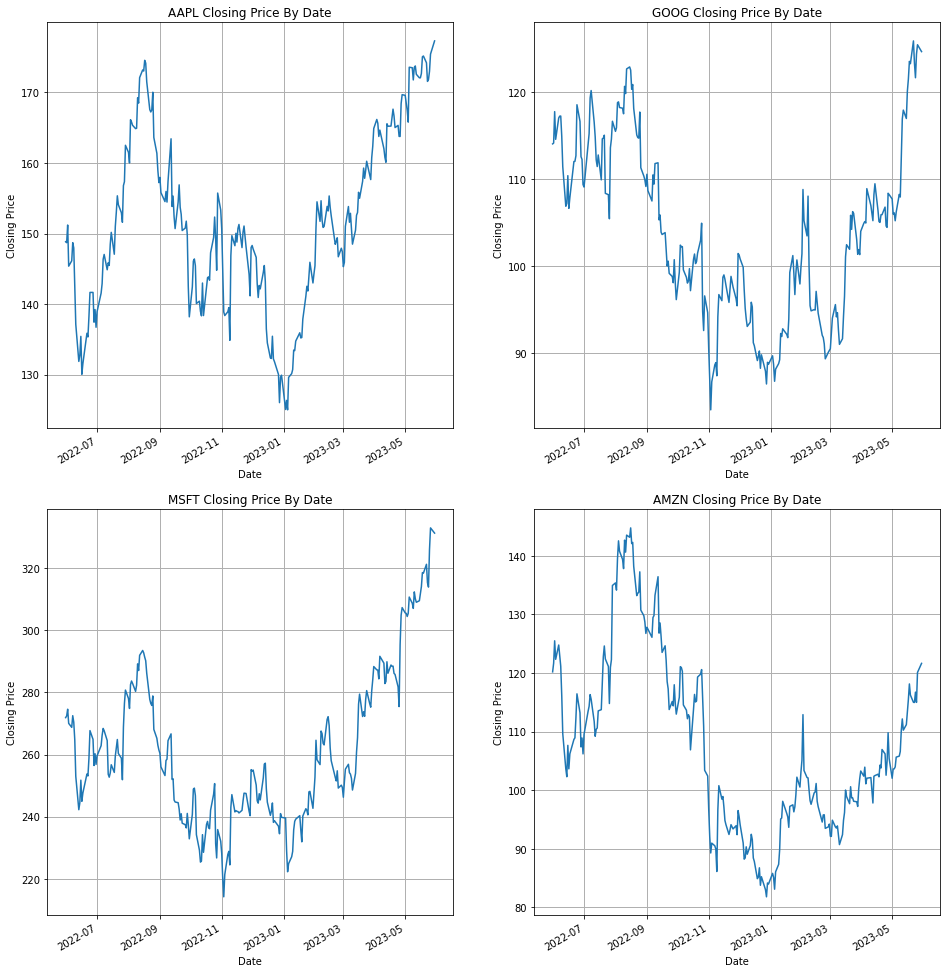

In [100]:
# Plot the non-adjusted closing prices 
plot_stock_key_figures("Close", "Closing Price")

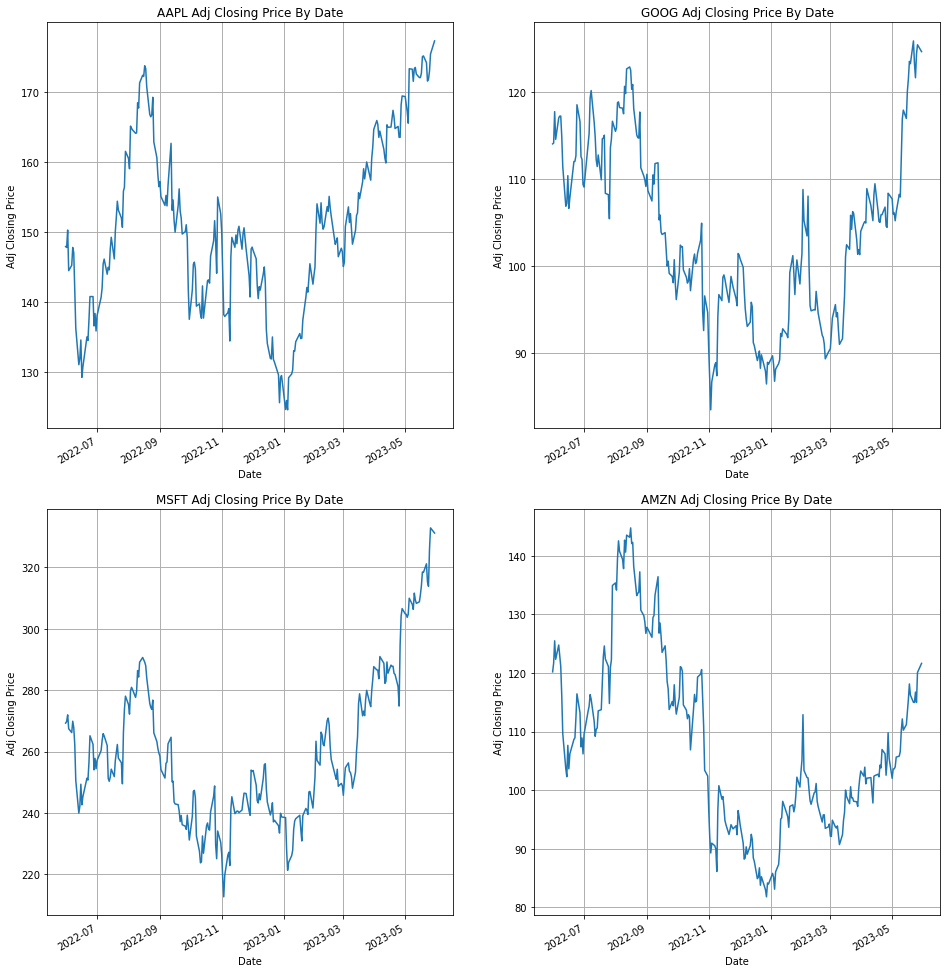

In [101]:
# Plot the adjusted closing prices 
plot_stock_key_figures("Adj Close", "Adj Closing Price")

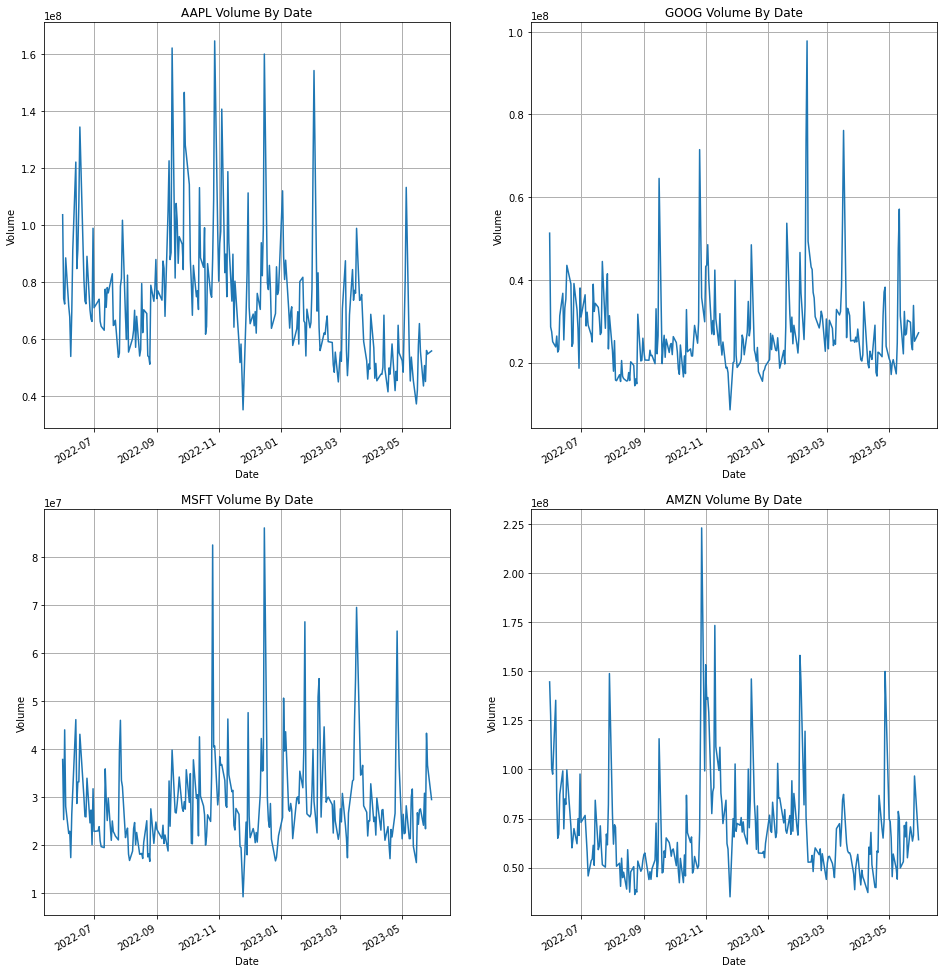

In [102]:
# Plot the volume traded 
plot_stock_key_figures("Volume", "Volume")

### Stock Moving Average (MA)

In [103]:
# Calculate different moving averages 
moving_average = [10, 14, 20, 50, 100]
for moving_average_days in moving_average: 
    for com_data in stock_data: 
        com_data[f'MA {moving_average_days}'] = com_data['Adj Close'].rolling(moving_average_days).mean()

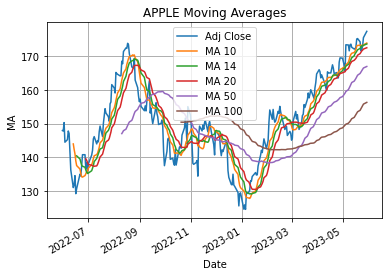

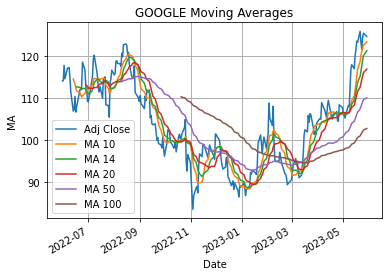

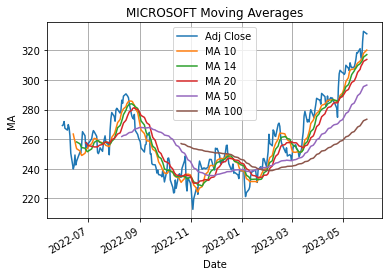

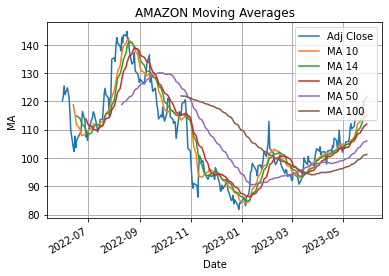

In [104]:
# Method: plot_ma 
# Parameters: com_data
    # com_data: The timeseries data of the desired stock/company 
# Output: 4 graphs printed, no returned output 
# Purpose of function is to clearly plot the different calculcated moving averages for each stock
def plot_ma(com_data): 
    com_data[['Adj Close', 'MA 10', 'MA 14', 'MA 20', 'MA 50', 'MA 100']].plot()
    plt.title(f'{com_data["company_name"][0]} Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('MA')
    plt.grid(linestyle='-', linewidth=1)   

for com_data in stock_data: 
    plot_ma(com_data)

In [105]:
# Method: test_time_series_stationarity 
# Parameters: time_series 
    # time_series: The timeseries data of the desired stock/company
# Output: 4 graphs printed with results of the Dickey-Fuller test, no returned output 
# Purpose of function is to perform the Dickey-Fuller test to test the stationarity of the data 
def test_time_series_stationarity(time_series, com_name):
    # Plot rolling statistics
    rolling_mean = time_series.rolling(14).mean()
    rolling_std = time_series.rolling(14).std()
    plt.plot(time_series, color='blue',label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title(f'{com_name} Rolling Mean & Standard Deviation')
    plt.show()

    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    df_test = adfuller(time_series, autolag='AIC')
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value',\
                                             '#Lags Used','Number of Observations Used'])
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'% key] = value
    print(df_output)

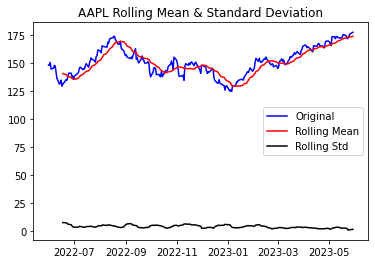

Results of Dickey-Fuller Test:
Test Statistic                  -1.252553
p-value                          0.650591
#Lags Used                       0.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


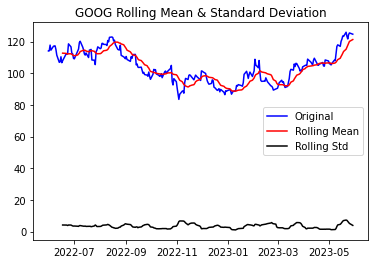

Results of Dickey-Fuller Test:
Test Statistic                  -1.560239
p-value                          0.503530
#Lags Used                       0.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


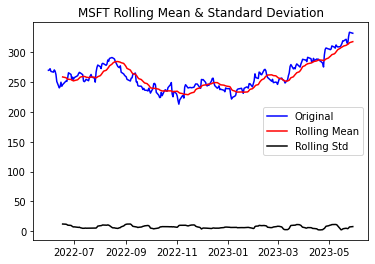

Results of Dickey-Fuller Test:
Test Statistic                  -0.284233
p-value                          0.927708
#Lags Used                       2.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


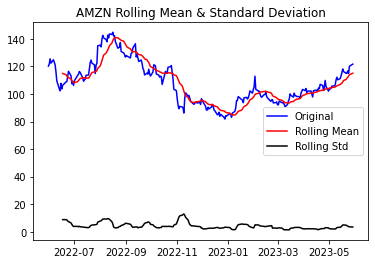

Results of Dickey-Fuller Test:
Test Statistic                  -1.552474
p-value                          0.507412
#Lags Used                       0.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


In [106]:
for com_name, com_data in downloaded_stock_data.items():
    test_time_series_stationarity(com_data['Adj Close'], com_name)

<Figure size 432x288 with 0 Axes>

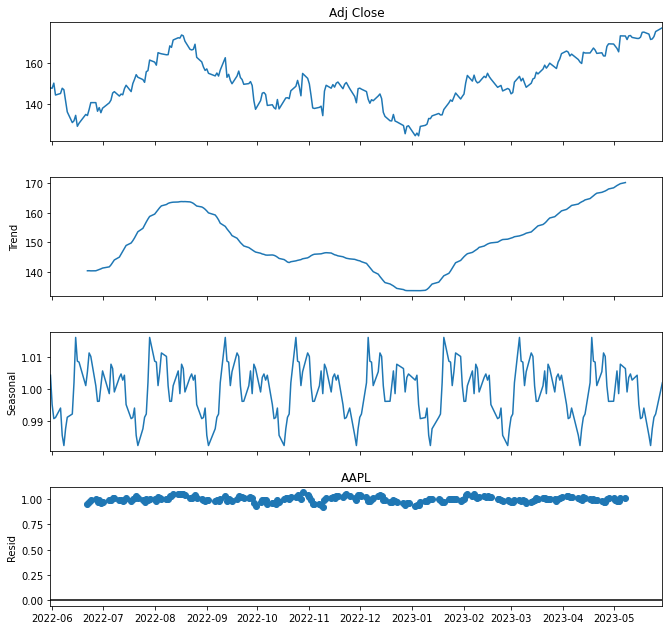

<Figure size 432x288 with 0 Axes>

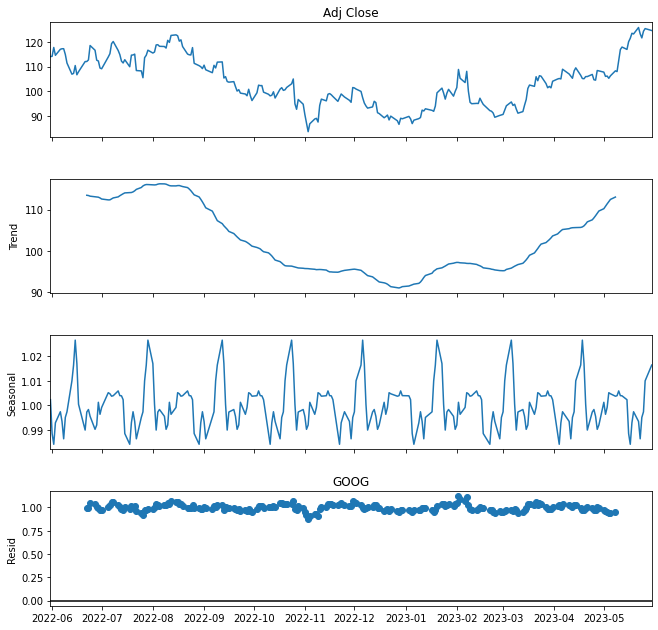

<Figure size 432x288 with 0 Axes>

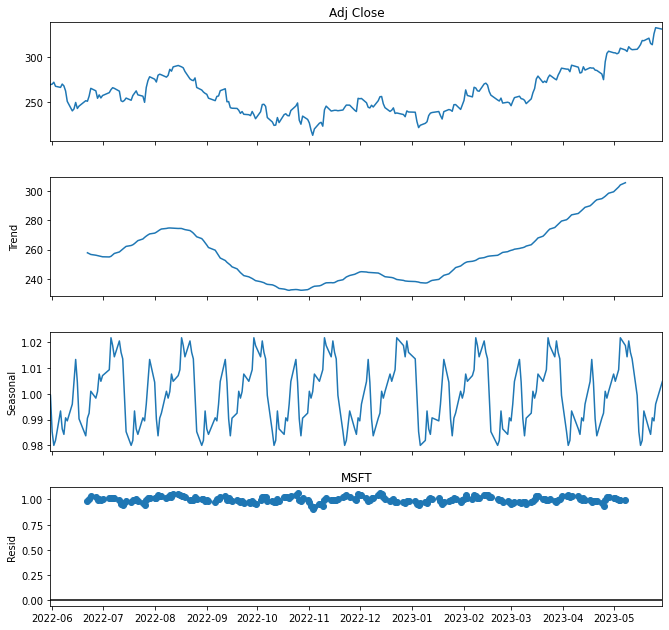

<Figure size 432x288 with 0 Axes>

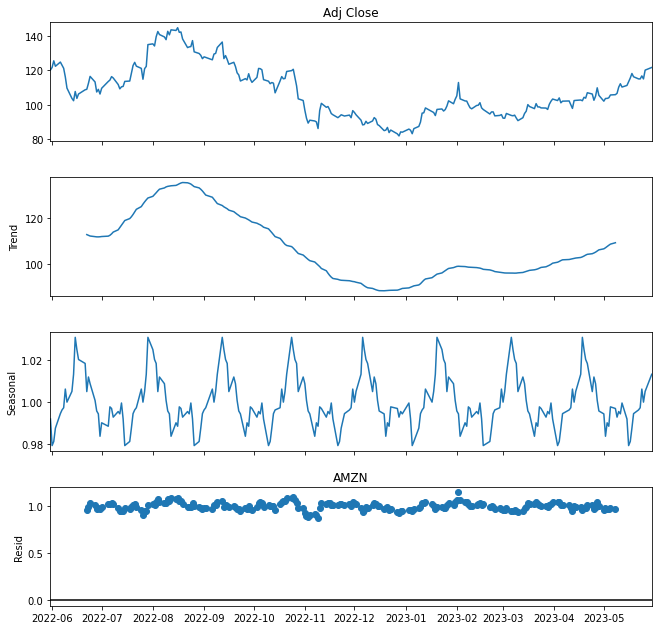

In [107]:
for com_name, com_data in downloaded_stock_data.items():
    result = seasonal_decompose(com_data['Adj Close'], model='multiplicative', period=30)
    fig = plt.figure() 
    fig = result.plot() 
    plt.title(com_name)
    fig.set_size_inches(10, 10)

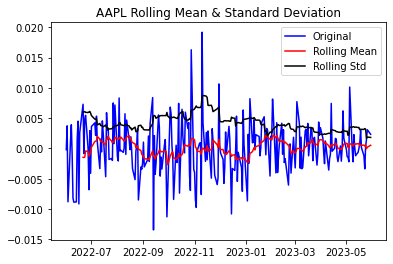

Results of Dickey-Fuller Test:
Test Statistic                -6.990992e+00
p-value                        7.745938e-10
#Lags Used                     4.000000e+00
Number of Observations Used    2.450000e+02
Critical Value (1%)           -3.457326e+00
Critical Value (5%)           -2.873410e+00
Critical Value (10%)          -2.573096e+00
dtype: float64


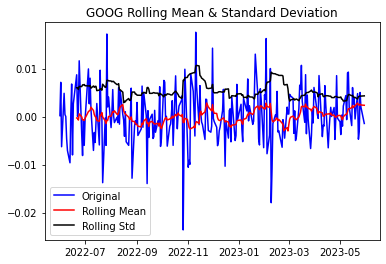

Results of Dickey-Fuller Test:
Test Statistic                -1.207510e+01
p-value                        2.299900e-22
#Lags Used                     1.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


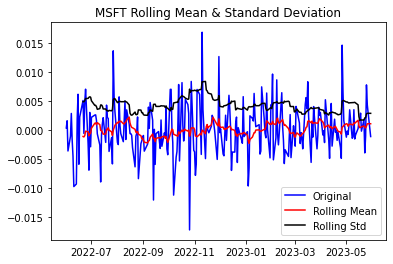

Results of Dickey-Fuller Test:
Test Statistic                -1.274761e+01
p-value                        8.671895e-24
#Lags Used                     1.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


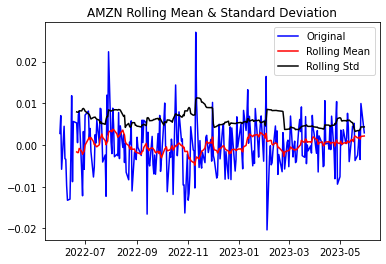

Results of Dickey-Fuller Test:
Test Statistic                -1.514025e+01
p-value                        7.027407e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64


In [108]:
# Removing trend and seasonality from the time series data for each stock 
AAPL_transformed = []
for com_name, com_data in downloaded_stock_data.items():
    com_data_transformed = com_data['Adj Close'].apply(np.log).apply(np.sqrt)
    com_data_differentiated = com_data_transformed - com_data_transformed.shift()
    com_data_differentiated = com_data_differentiated.dropna()
    test_time_series_stationarity(com_data_differentiated, com_name)
    if com_name == 'AAPL': 
        AAPL_transformed.append(com_data_transformed)

### Forecasting 

In [109]:
# Forecasting AAPL 
AAPL = stock_data[0]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_stock_data = scaler.fit_transform(AAPL[['Adj Close']])
print(AAPL[['Adj Close']][1:11])
print("Scaled") 
scaled_stock_data[1:11]

             Adj Close
Date                  
2022-06-01  147.827301
2022-06-02  150.312454
2022-06-03  144.517044
2022-06-06  145.272552
2022-06-07  147.827301
2022-06-08  147.081741
2022-06-09  141.793320
2022-06-10  136.316040
2022-06-13  131.097198
2022-06-14  131.971970
Scaled


array([[0.44014037],
       [0.48734802],
       [0.37725916],
       [0.3916107 ],
       [0.44014037],
       [0.42597782],
       [0.32551964],
       [0.22147395],
       [0.12233751],
       [0.13895455]])

In [110]:
X, y = [], []
num_days_pred = 60
for index in range(len(scaled_stock_data)):
    timestep_index = index + num_days_pred 
    if timestep_index < len(scaled_stock_data): 
        X.append(scaled_stock_data[index:timestep_index])
        y.append(scaled_stock_data[timestep_index])
    else: 
        break 
X = np.array(X)
y = np.array(y)

In [111]:
X[0]

array([[0.44259514],
       [0.44014037],
       [0.48734802],
       [0.37725916],
       [0.3916107 ],
       [0.44014037],
       [0.42597782],
       [0.32551964],
       [0.22147395],
       [0.12233751],
       [0.13895455],
       [0.18937233],
       [0.0879701 ],
       [0.11629463],
       [0.1976807 ],
       [0.1878619 ],
       [0.24300053],
       [0.30701421],
       [0.30701421],
       [0.22732755],
       [0.26112829],
       [0.21373166],
       [0.2554631 ],
       [0.30512581],
       [0.33080687],
       [0.39557619],
       [0.40860513],
       [0.36762905],
       [0.38632318],
       [0.37933654],
       [0.43560821],
       [0.46770954],
       [0.40917208],
       [0.48338253],
       [0.52190383],
       [0.56552425],
       [0.54173129],
       [0.52020442],
       [0.49471234],
       [0.59271545],
       [0.60329048],
       [0.70072692],
       [0.68184381],
       [0.65351899],
       [0.76908406],
       [0.76304147],
       [0.7586925 ],
       [0.749

In [112]:
# Reshape X for the LSTM model 
X = X.reshape((X.shape[0], X.shape[1], 1))

In [113]:
X.shape

(191, 60, 1)

In [114]:
# Using the last 60 days worth of data for testing
test_days = 60 
X_test, y_test = X[-test_days:], y[-test_days:]
X_train, y_train = X[:-test_days], y[:-test_days]

In [115]:
len(X_train), len(y_train)

(131, 131)

In [116]:
len(X_test), len(y_test)

(60, 60)

In [117]:
train_original = AAPL.iloc[:-test_days]
test_original = AAPL.iloc[-test_days:]
# plt.figure(figsize=(10,6))
# plt.grid(True)
# plt.xlabel('Dates')
# plt.ylabel('Closing Prices')
# plt.plot(train_original, 'b', label='Train data')
# plt.plot(test_original, 'g', label='Test data')
# plt.legend()

In [118]:
# Modelling with a vanilla/very simple LSTM 
model = Sequential()    
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 50)                10400     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.fit(X_train, 
          y_train, 
          epochs=15, 
          batch_size = 64)

Epoch 1/15
3/3 [==============================] - 2s 27ms/step - loss: 0.1877
Epoch 2/15
3/3 [==============================] - 0s 23ms/step - loss: 0.1140
Epoch 3/15
3/3 [==============================] - 0s 22ms/step - loss: 0.0549
Epoch 4/15
3/3 [==============================] - 0s 23ms/step - loss: 0.0198
Epoch 5/15
3/3 [==============================] - 0s 22ms/step - loss: 0.0264
Epoch 6/15
3/3 [==============================] - 0s 24ms/step - loss: 0.0289
Epoch 7/15
3/3 [==============================] - 0s 24ms/step - loss: 0.0159
Epoch 8/15
3/3 [==============================] - 0s 24ms/step - loss: 0.0139
Epoch 9/15
3/3 [==============================] - 0s 23ms/step - loss: 0.0159
Epoch 10/15
3/3 [==============================] - 0s 22ms/step - loss: 0.0171
Epoch 11/15
3/3 [==============================] - 0s 22ms/step - loss: 0.0166
Epoch 12/15
3/3 [==============================] - 0s 22ms/step - loss: 0.0148
Epoch 13/15
3/3 [==============================] - 0s 23ms/st

In [120]:
# Evaluate the model on the test data using
test_results = model.evaluate(X_test, y_test, batch_size=64)
test_results

1/1 [==============================] - 0s 377ms/step - loss: 0.0384


0.03841729462146759

In [121]:
AAPL_transformed[0]

Date
2022-05-31    2.235379
2022-06-01    2.235183
2022-06-02    2.238910
2022-06-03    2.230112
2022-06-06    2.231280
                ...   
2023-05-23    2.268244
2023-05-24    2.268604
2023-05-25    2.270074
2023-05-26    2.273156
2023-05-30    2.275487
Name: Adj Close, Length: 251, dtype: float64

2/2 [==============================] - 0s 9ms/step


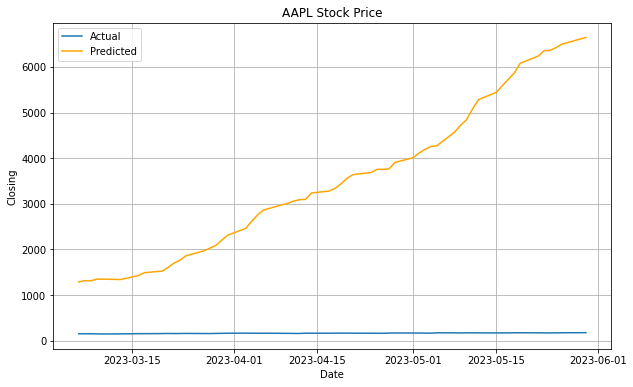

In [122]:
# Prediction
y_pred = model.predict(X_test)
pred_data = pd.DataFrame(y_pred[:,0], test_original.index,columns=['Close'])
pred_data['Close'] = pred_data['Close'] + AAPL_transformed[0].shift().values[-test_days:] 

# Re-transform
pred_data = pred_data.apply(np.square).apply(np.exp)

# Compare actual vs. predicted 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing')
plt.plot(test_original['Close'], label='Actual')
plt.plot(pred_data, 'orange', label='Predicted')
plt.title('AAPL Stock Price')
plt.legend()

In [123]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
5/5 [==============================] - 4s 63ms/step - loss: 0.0771
Epoch 2/15
5/5 [==============================] - 0s 72ms/step - loss: 0.0255
Epoch 3/15
5/5 [==============================] - 0s 75ms/step - loss: 0.0235
Epoch 4/15
5/5 [==============================] - 0s 71ms/step - loss: 0.0146
Epoch 5/15
5/5 [==============================] - 0s 68ms/step - loss: 0.0128
Epoch 6/15
5/5 [==============================] - 0s 65ms/step - loss: 0.0112
Epoch 7/15
5/5 [==============================] - 0s 67ms/step - loss: 0.0107
Epoch 8/15
5/5 [==============================] - 0s 71ms/step - loss: 0.0106
Epoch 9/15
5/5 [==============================] - 0s 64ms/step - loss: 0.0095
Epoch 10/15
5/5 [==============================] - 0s 62ms/step - loss: 0.0097
Epoch 11/15
5/5 [==============================] - 0s 66ms/step - loss: 0.0092
Epoch 12/15
5/5 [==============================] - 0s 63ms/step - loss: 0.0102
Epoch 13/15
5/5 [==============================] - 0s 69ms/st

In [124]:
# Evaluate the model on the test data using
test_results = model.evaluate(X_test, y_test, batch_size=32)
print(test_results)

2/2 [==============================] - 1s 22ms/step - loss: 0.0102
0.010241963900625706


2/2 [==============================] - 1s 24ms/step


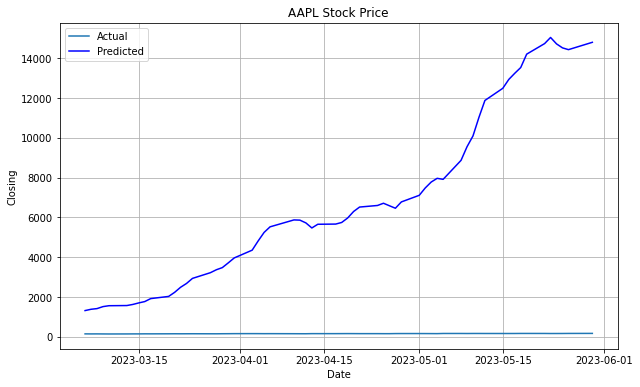

In [125]:
# Prediction
y_pred = model.predict(X_test)
pred_data = pd.DataFrame(y_pred[:,0], test_original.index,columns=['Close'])
pred_data['Close'] = pred_data['Close'] + AAPL_transformed[0].shift().values[-test_days:] 

# Re-transform
pred_data = pred_data.apply(np.square).apply(np.exp)

# Compare actual vs. predicted 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing')
plt.plot(test_original['Close'], label='Actual')
plt.plot(pred_data, 'b', label='Predicted')
plt.title('AAPL Stock Price')
plt.legend()

In [ ]:
# Ways to improve upon the current models